<img alt="logo_lnmb.jpeg" src="logo_lnmb.jpeg"/>
<center> 
    <h1>STOCHASTIC PROGRAMMING</h1>
    <h3>LNMB Ph.D. Course : 2021-2022</h2>
    <h2> Project Report</h2><br> <br>

    
</center>
    <em>Submitted by:</em> Nanda Kishor Panda (<a href="n.k.panda@tudelft.nl">n.k.panda@tudelft.nl</a>), Neda Vahabzad (<a href="n.vahabzad@tudelft.nl">n.vahabzad@tudelft.nl</a>)

<span style="color:red;font-weight:400;font-size:20px">
Importing necessary libraries
</span>

In [1]:
import numpy as np
from pyomo.environ import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# from pysp import *
from helper_functions import *
from tabulate import tabulate
import mpisppy.utils.sputils as sputils
import pandas as pd
from  itertools import product
from mpisppy.opt.lshaped import LShapedMethod
from numpy.random import default_rng
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
# https://mpi-sppy.readthedocs.io/en/latest/examples.html

[    0.00] Initializing mpi-sppy



<span style="color:blue;font-weight:800;font-size:30px">
Single discrete random parameter: $\xi_{1,2,3}$</span>

## Deterministic model formulation (MOD1)<br>
<center>$
\min_{x\geq0}{\left\{\underbrace{\sum_{i=1}^nc_ix_i}_{\text{investment cost}}+\underbrace{\sum_{i=1}^n\sum_{j=1}^kq_iT_jy_{ij}}_{\text{operating cost}}\right\}}$</center><br>
<ul><ul><ul><ul><em>subject to:</em><br></ul></ul></ul></ul>
<center>
$
\begin{align}
&\sum_{i=1}^n x_i\geq \sum_{j=1}^k \xi_j^{max}\\
&\sum_{i=1}^nc_ix_i\leq c_{max}\\
&\sum_{j=1}^ky_{ij}\leq x_i\quad \quad i=\{1,\cdots,n\}\\
&\sum_{i=1}^ny_{ij}\geq \xi_j \quad \quad j=\{1,\cdots,k\}
\end{align}
$
</center>

## Expected value (EV) solution (MOD1)
For expected value solution, the expectation of each random parameters is used as input to the deterministic model as shown below:<br>

Solve MOD1 with:<br>
<ul> <ul> <ul> <ul> $
\begin{align}
&\xi_j = \bar{\xi_j}&&\quad\quad \forall \: j={1,2,3}\\
\text{where;}\\
&\bar{\xi_j}=\mathbb{E}[\xi_j]=\sum_{l=1}^3\xi_j^{(l)}\mathcal{P}(\xi_j^{(l)}) &&\quad\quad\forall \: j={1,2,3}
\end{align}
$</ul> </ul> </ul> </ul><br><br>
Expected Value (EV):
<ul> <ul> <ul> <ul>
$
EV:=\min_{x\geq0}\left(g(E[\xi], x)\right)=g(\bar{\xi}, \bar{x})\\
\bar{x}\text{ is the optimal solution of MOD1 by using }\xi = \bar{\xi}
$</ul> </ul> </ul> </ul>

## Expected value of using the EV solution (EEV) (MOD1.1)
The expected value of using the EV solution can be calculated using the following equation:<br>

\begin{align}
EEV:= \mathbb{E}_{\xi}\left[g(\bar{x}, \xi)\right]
\end{align}
EEV can be exactly calculated for m random discrete variables at d values each by solving $d^n$ linear programs. The EEV is calculated using sample mean approximation as follows:<br>

- For $i = 1,...,L$ where $L=d^m$ and for this particular problem $d=m=3$:
    - Sample $\xi_i$ from the discrete realizations<br>
    - Compute the optimal value of $x_i$ for $\bar{\xi}$: $\bar{x}_i$<br>
    - $EEV_l = \sum_{i=1}^n c_i\bar{x}_i+Q(\bar{x}, \xi^{(l)})$ where, $l$ is the $l^{th}$ scenario. Here $l={1,2,...,27}$
    - Finally, $EEV = \frac{1}{L}\sum_{l=1}^LEEV_l$
    - $Q(\bar{x}, \xi^{(l)})$ can be written as a linear program as follows:
\begin{align}
    \min_{y\geq0}\left\{\sum_{i=1}^n \sum_{j=1}^kq_iT_jy_{ij}\right\}
\end{align}

\begin{align}
\text{Subject to:}&\\
&\sum_{j=1}^ky_{ij}\leq \bar{x}_i\quad \quad i=\{1,\cdots,n\}\\
&\sum_{i=1}^ny_{ij}\geq \xi_j^{(l)} \quad \quad j=\{1,\cdots,k\}
\end{align}

## Wait-and-See problem
The wait-and-see problem is formulated by solving MOD1 for all possible realizations of $\xi_j$. As $\xi_j$ is discrete and mutually independent there are a total of 27 realizations.<br>
The mean value of wait-and-see solution is denoted by WS and can be formulated as:<br><br>
<center>
$
WS:=\mathbb{E}_{\xi}\left[min_{x\geq0}\:g(\xi, x)\right]=\mathbb{E}_{\xi}\left[g(\xi,\hat{x}(\xi))\right]
$</center>


## Stochastic recourse model (MOD2)
The stochastic 2-stage model can be formulated by chainging the objective function of the deterministic model (MOD1) and adding random parameter $\xi_j$ as follows:
<center>$
\min_{x\geq0}{\underbrace{\left\{\sum_{i=1}^nc_ix_i+\underbrace{\mathbb{E}_{\xi}\left[\min_{y\geq0}\left\{\sum_{i=1}^n \sum_{j=1}^kq_iT_jy_{ij}\right\}\right]}_{\text{second stage}}\right\}}_{\text{first stage}}}$</center><br>
<ul><ul><ul><ul><em>subject to:</em><br></ul></ul></ul></ul>
<center>
    <center>
$
\begin{align}
\text{first stage constraints:}&\\
&\sum_{i=1}^n x_i\geq \sum_{j=1}^k \xi_j^{max}\\
&\sum_{i=1}^nc_ix_i\leq c_{max}\\
\text{second stage constraints:}&\\
&\sum_{j=1}^ky_{ij}\leq x_i\quad \quad i=\{1,\cdots,n\}\\
&\sum_{i=1}^ny_{ij}\geq \xi_j\quad \quad j=\{1,\cdots,k\}
\end{align}
$
</center><br>
    

<span style="color:red;font-weight:400;font-size:30px">
Answers for Q(a)
</span>

<span style="color:red;font-weight:400;font-size:20px">
Calculation of EV and $\bar{x}$
</span>

In [2]:
mean_values_xi = [5,3,2]
demand_max = [7,4,3]  # Based on maximum values of each mode
expected_value_model_qa = create_model_qa(capacity_per_mode=mean_values_xi, capacity_max = demand_max ) 
SolverFactory('gurobi').solve(expected_value_model_qa)
print_res(expected_value_model_qa, question='qa')
xbar_qa = [expected_value_model_qa.x[n].value for n in expected_value_model_qa.n]

+--------------+------------------------+--------------------+------------+------------+
| Technologies | Installed Capacity (x̄) |     Usage (T1)     | Usage (T2) | Usage (T3) |
+--------------+------------------------+--------------------+------------+------------+
| Technology-1 |   2.8333333333333335   | 2.8333333333333335 |    0.0     |    0.0     |
| Technology-2 |          3.0           |        0.0         |    3.0     |    0.0     |
| Technology-3 |   2.1666666666666665   | 2.1666666666666665 |    0.0     |    0.0     |
| Technology-4 |          6.0           |        0.0         |    0.0     |    2.0     |
+--------------+------------------------+--------------------+------------+------------+
Total investment cost     = 120.0
Total operation cost = 274.6666666666667
Total objective cost (EV) = 394.6666666666667


<span style="color:red;font-weight:400;font-size:20px">
Discrete sampling for: $\xi_{i=\{1,2,3\}}$
</span>

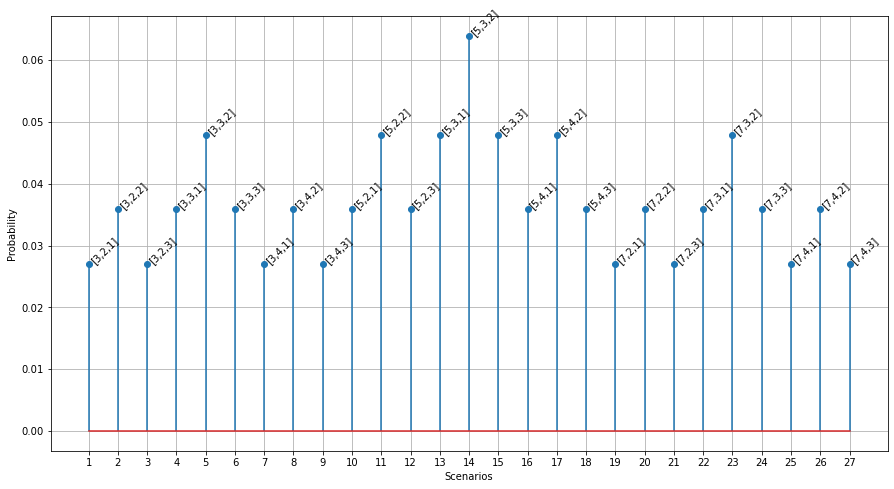

In [3]:
scenario_names_qa, scenarios_qa, scenarios_qa_prob = generate_scenario_qa() 
# Generate scenario along with their probability

<span style="color:red;font-weight:400;font-size:20px">
Calculation of EEV Q(a)
</span>

In [4]:
EEV_l_qa = []  # Making a empty list

for s in scenarios_qa.iterrows():
    model_eev_qa = create_eev_model_qa(x_bar=xbar_qa, capacity_per_mode=
                                       [s[1][0], s[1][1], s[1][2]], capacity_max =demand_max)
    SolverFactory('gurobi').solve(model_eev_qa)
    EEV_l_qa.append(sum(np.array([10, 7 , 16, 6])*np.array(xbar_qa))+ value(model_eev_qa.obj))

EEV_df_qa = pd.DataFrame(index=scenarios_qa.index, data={'EEV_l_qa':EEV_l_qa})
print(tabulate(EEV_df_qa, headers=['Scenarios', 'EEV_l_qa'], tablefmt='psql'))
print('EEV = %.2f'%np.mean(EEV_l_qa))

+-------------+------------+
| Scenarios   |   EEV_l_qa |
|-------------+------------|
| scenario-1  |    275.167 |
| scenario-2  |    279.667 |
| scenario-3  |    284.167 |
| scenario-4  |    302.167 |
| scenario-5  |    306.667 |
| scenario-6  |    312.167 |
| scenario-7  |    329.167 |
| scenario-8  |    334.667 |
| scenario-9  |    340.167 |
| scenario-10 |    361.167 |
| scenario-11 |    366.667 |
| scenario-12 |    372.167 |
| scenario-13 |    389.167 |
| scenario-14 |    394.667 |
| scenario-15 |    400.167 |
| scenario-16 |    422.167 |
| scenario-17 |    427.667 |
| scenario-18 |    433.167 |
| scenario-19 |    458.167 |
| scenario-20 |    463.667 |
| scenario-21 |    469.167 |
| scenario-22 |    491.167 |
| scenario-23 |    496.667 |
| scenario-24 |    502.167 |
| scenario-25 |    524.167 |
| scenario-26 |    529.667 |
| scenario-27 |    535.167 |
+-------------+------------+
EEV = 400.04


<span style="color:red;font-weight:400;font-size:20px">
Calculation of Wait and See solution
</span>

In [5]:
solve_ws_qa(demandmax=demand_max,all_scenarios=scenarios_qa, create_model=create_model_qa)

      Scenarios  Technology-1  Technology-2  Technology-3  Technology-4  \
0    scenario-1      0.000000      3.000000      3.000000           8.0   
1    scenario-2      0.000000      2.000000      3.000000           9.0   
2    scenario-3      0.000000      2.000000      3.000000           9.0   
3    scenario-4      1.000000      2.000000      3.000000           8.0   
4    scenario-5      1.000000      2.000000      3.000000           8.0   
5    scenario-6      1.000000      2.000000      3.000000           8.0   
6    scenario-7      0.666667      3.333333      3.000000           7.0   
7    scenario-8      0.666667      3.333333      3.000000           7.0   
8    scenario-9      0.666667      3.333333      3.000000           7.0   
9   scenario-10      2.666667      2.000000      2.333333           7.0   
10  scenario-11      2.666667      2.000000      2.333333           7.0   
11  scenario-12      2.666667      2.000000      2.333333           7.0   
12  scenario-13      2.83

<span style="color:red;font-weight:400;font-size:20px">
Calculation of TS using L-shaped method
</span>

In [6]:
# Input all the option parameters required for solving using Benders decomposition
options_qa_LS = {
    "root_solver": "gurobi",
    "sp_solver": "gurobi",
    "sp_solver_options" : {"threads" : 1},
    "valid_eta_lb":{name: -432000 for name in scenario_names_qa},
    "max_iter": 10,
}

ls_qa = LShapedMethod(options_qa_LS, 
                   scenario_names_qa, 
                   scenario_creator_qa, 
                   scenario_creator_kwargs = {'S':scenarios_qa, 
                                              'prob_df':scenarios_qa_prob}) #Ready the solver
ls_qa.lshaped_algorithm() #Solve

print_res_ts(ls_qa.root, question='qa') #Print the solution

[    7.09] Initializing SPBase
Current Iteration: 1 Time Elapsed:    0.00 Current Objective: -Inf
Current Iteration: 2 Time Elapsed:    2.23 Time Spent on Last Master:    0.08 Time Spent Generating Last Cut Set:    2.15 Current Objective: -11663940.00
Current Iteration: 3 Time Elapsed:    4.43 Time Spent on Last Master:    0.08 Time Spent Generating Last Cut Set:    2.13 Current Objective:  284.00
Current Iteration: 4 Time Elapsed:    6.59 Time Spent on Last Master:    0.08 Time Spent Generating Last Cut Set:    2.08 Current Objective:  359.96
Current Iteration: 5 Time Elapsed:    8.82 Time Spent on Last Master:    0.08 Time Spent Generating Last Cut Set:    2.14 Current Objective:  384.45
Current Iteration: 6 Time Elapsed:   10.98 Time Spent on Last Master:    0.08 Time Spent Generating Last Cut Set:    2.08 Current Objective:  397.16
Current Iteration: 7 Time Elapsed:   13.14 Time Spent on Last Master:    0.08 Time Spent Generating Last Cut Set:    2.07 Current Objective:  397.67
Con

<span style="color:blue;font-weight:800;font-size:30px">
Addition of operational uncertainity: $\alpha_{1,2,3,4}$</span>

## Formulation of the modified recourse model (MOD2)
The stochastic 2-stage model can be formulated by adding the new random parameters to the previouse recourse model as follows:
<center>$
\min_{x\geq0}{\underbrace{\left\{\sum_{i=1}^nc_ix_i+\underbrace{\mathbb{E}_{\xi}\left[\min_{y\geq0}\left\{\sum_{i=1}^n \sum_{j=1}^kq_iT_jy_{ij}\right\}\right]}_{\text{second stage}}\right\}}_{\text{first stage}}}$</center><br>
<ul><ul><ul><ul><em>subject to:</em><br></ul></ul></ul></ul>
</center>
 <center>
$
\begin{align}
\text{first stage constraints:}&\\
&\sum_{i=1}^nc_ix_i\leq c_{max}\\
\text{second stage constraints:}&\\
&\sum_{j=1}^ky_{ij}\leq \alpha_ix_i&&\quad \quad i=\{1,\cdots,n\}\\
&\sum_{i=1}^ny_{ij}\geq \xi_j&&\quad \quad j=\{1,\cdots,k\}
\end{align}
$
</center><br>
It is to be noted that by the addition of a fifth virtual technology with 0 investment cost the constraint: $\sum_{i=1}^nx_i\geq \sum_{j=1}^k \xi_j^{max}$ becomes redundant as for any values of $y_{i,j}$ this constraint can always be satishfied by any value of $x_5$ as it does not affect the total investment cost.

<span style="color:red;font-weight:400;font-size:20px">
Sampling and scenario generations from continous and discrete distributions<br>
</span>

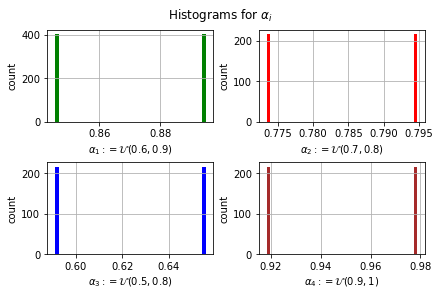

In [7]:
number_of_samples = 2 #Number of samples to be sampled from each of continous random parameter
scenarios_q2, scenarios_q2_prob = generate_scenario_qb(number_of_samples, plot=True, seed=1245) 
    #Fix seed at 1225 for reproducibility

<span style="color:red;font-weight:400;font-size:20px">
Calculation of EV and $\bar{x}$ for Q(b)
</span>

In [8]:
mean_values_qb = [scenarios_q2['alpha_1'].mean(), scenarios_q2['alpha_2'].mean(),
                  scenarios_q2['alpha_3'].mean(), scenarios_q2['alpha_4'].mean(),
                  scenarios_q2['xi_1'].mean(), scenarios_q2['xi_2'].mean(),
                  scenarios_q2['xi_3'].mean()]
expected_value_model_qb = create_model_qb(random_parameters=mean_values_qb) # By default all random parameters are set to 1
SolverFactory('gurobi').solve(expected_value_model_qb)
print_res(expected_value_model_qb, question='qb')
xbar_qb = [expected_value_model_qb.x[n].value for n in expected_value_model_qb.n]

+--------------+------------------------+------------+------------+------------+
| Technologies | Installed Capacity (x̄) | Usage (T1) | Usage (T2) | Usage (T3) |
+--------------+------------------------+------------+------------+------------+
| Technology-1 |   9.194074809305528    |    5.0     |    3.0     |    0.0     |
| Technology-2 |          0.0           |    0.0     |    0.0     |    0.0     |
| Technology-3 |          0.0           |    0.0     |    0.0     |    0.0     |
| Technology-4 |          0.0           |    0.0     |    0.0     |    0.0     |
| Technology-5 |          2.0           |    0.0     |    0.0     |    2.0     |
+--------------+------------------------+------------+------------+------------+
Total investment cost     = 91.94074809305528
Total operation cost = 292.0
Total objective cost (EV) = 383.9407480930553


<span style="color:red;font-weight:400;font-size:20px">
Solving two stage (TS) recourse model for Q(b) using L-shaped method
</span>

In [9]:

options_qb_LS = {"root_solver": "gurobi",
                 "sp_solver": "gurobi",
                 "sp_solver_options" : {"threads" : 1},
                 "valid_eta_lb": {name: -432000 for name in list(scenarios_q2.index)},
                 "max_iter": 15}
ls_qb = LShapedMethod(options_qb_LS, 
                   list(scenarios_q2.index), 
                   scenario_creator_qb, 
                   scenario_creator_kwargs = {'S':scenarios_q2, 'prob_df':scenarios_q2_prob})
result = ls_qb.lshaped_algorithm()
print_res_ts(ls_qb.root)


[   23.93] Initializing SPBase
Current Iteration: 1 Time Elapsed:    0.00 Current Objective: -Inf
Current Iteration: 2 Time Elapsed:   34.93 Time Spent on Last Master:    0.08 Time Spent Generating Last Cut Set:   34.85 Current Objective: -186624000.00
Current Iteration: 3 Time Elapsed:   70.15 Time Spent on Last Master:    0.10 Time Spent Generating Last Cut Set:   35.11 Current Objective:  224.00
Current Iteration: 4 Time Elapsed:  105.86 Time Spent on Last Master:    0.11 Time Spent Generating Last Cut Set:   35.59 Current Objective:  224.00
Current Iteration: 5 Time Elapsed:  144.48 Time Spent on Last Master:    0.15 Time Spent Generating Last Cut Set:   38.47 Current Objective:  314.77
Current Iteration: 6 Time Elapsed:  183.38 Time Spent on Last Master:    0.17 Time Spent Generating Last Cut Set:   38.73 Current Objective:  360.63
Current Iteration: 7 Time Elapsed:  221.26 Time Spent on Last Master:    0.17 Time Spent Generating Last Cut Set:   37.71 Current Objective:  386.18
Cu

<span style="color:red;font-weight:400;font-size:20px">
Calculation of Wait and See solution
</span>

In [10]:
solve_ws_qb(all_scenarios=scenarios_q2, create_model=create_model_qb)

432it [00:37, 11.41it/s]

        Scenarios  Technology-1  Technology-2  Technology-3  Technology-4  \
0      scenario_0      5.915022      0.000000           0.0           0.0   
1      scenario_1      5.915022      0.000000           0.0           0.0   
2      scenario_2      5.915022      0.000000           0.0           0.0   
3      scenario_3      7.098026      0.000000           0.0           0.0   
4      scenario_4      7.098026      0.000000           0.0           0.0   
..            ...           ...           ...           ...           ...   
427  scenario_427     11.173861      0.000000           0.0           0.0   
428  scenario_428     11.173861      0.000000           0.0           0.0   
429  scenario_429     10.916097      1.548434           0.0           0.0   
430  scenario_430     10.916097      1.548434           0.0           0.0   
431  scenario_431     10.916097      1.548434           0.0           0.0   

     Technology-5  Total Investment  Total Operation Cost  \
0             

<span style="color:red;font-weight:400;font-size:20px">
Calculation of EEV for Q (b)
</span>

The EEV calculation for this model is tricky. By the omission of constraint on the maximum demand $\left(\sum_{i=1}^nx_i\geq \sum_{j=1}^k\xi_j^{max}\right)$ the EEV model returns infeasible solution for some of the scenarios where: $\sum_{j=1}^k\xi_j>\sum_{j=1}^k\bar{\xi}_j$. Moreover, if we adjust the $\bar{x_i}$ solution by adding extra units to the fifth virtual technology (as it has 0 investment costs) sertain instances of the EEV model still output infeasible solution due to the randomness of the operational availability, which make the maximum demand constraint again infeasible.

In [11]:
import logging
import sys
logging.getLogger('pyomo.core').setLevel(logging.ERROR)
EEV_l_qb = [] #operation cost minimization
ind_qb = []
max_demand=14
total_xbar_qb = sum(xbar_qb)
diff = max(0, max_demand-total_xbar_qb)
xbar_qb_adj = np.array(xbar_qb)+[0, 0 , 0, 0, diff]

for s in tqdm(scenarios_q2.iterrows()):
    model_eev_qb = create_eev_model_qb(x_bar=xbar_qb_adj, random_parameters=[1,1,1,1, s[1][4], s[1][5], s[1][6]])
    SolverFactory('gurobi').solve(model_eev_qb)
    try:
        EEV_l_qb.append(sum(np.array([10, 7 , 16, 6, 0])*np.array(xbar_qb))+ value(model_eev_qb.obj))
        ind_qb.append(s[0])
    except:
         pass

    
EEV_df = pd.DataFrame(index=ind_qb, data={'EEV_l':EEV_l_qb})
print(tabulate(EEV_df, headers=['Scenarios', 'EEV_l'], tablefmt='psql'))
print('EEV = %.2f'%np.mean(EEV_l_qb))

432it [00:37, 11.61it/s]

+--------------+---------+
| Scenarios    |   EEV_l |
|--------------+---------|
| scenario_0   | 263.941 |
| scenario_1   | 267.941 |
| scenario_2   | 271.941 |
| scenario_3   | 287.941 |
| scenario_4   | 291.941 |
| scenario_5   | 295.941 |
| scenario_6   | 311.941 |
| scenario_7   | 315.941 |
| scenario_8   | 324.776 |
| scenario_9   | 343.941 |
| scenario_10  | 347.941 |
| scenario_11  | 356.776 |
| scenario_12  | 367.941 |
| scenario_13  | 376.776 |
| scenario_14  | 386.776 |
| scenario_15  | 396.776 |
| scenario_16  | 406.776 |
| scenario_17  | 416.776 |
| scenario_18  | 428.776 |
| scenario_19  | 438.776 |
| scenario_20  | 448.776 |
| scenario_21  | 482.954 |
| scenario_22  | 492.954 |
| scenario_23  | 502.954 |
| scenario_24  | 542.954 |
| scenario_25  | 552.954 |
| scenario_26  | 562.954 |
| scenario_27  | 263.941 |
| scenario_28  | 267.941 |
| scenario_29  | 271.941 |
| scenario_30  | 287.941 |
| scenario_31  | 291.941 |
| scenario_32  | 295.941 |
| scenario_33  | 311.941 |
|

<span style="color:blue;font-weight:800;font-size:30px">
Addition of random parameter in mode duration for $T_{i=\{2,3\}}$</span>

## Formulation of the modified recourse model (MOD3)
The stochastic 2-stage model can be formulated by adding the new random parameters to the previouse recourse model
(MOD2) as follows:
<center>$
\min_{x\geq0}{\underbrace{\left\{\sum_{i=1}^nc_ix_i+\underbrace{\mathbb{E}_{\xi}\left[\min_{y\geq0}\left\{\sum_{i=1}^n \sum_{j=1}^kq_i\tau_jy_{ij}\right\}\right]}_{\text{second stage}}\right\}}_{\text{first stage}}}$</center><br>
<ul><ul><ul><ul><em>subject to:</em><br></ul></ul></ul></ul>
</center>
 <center>
$
\begin{align}
\text{first stage constraints:}&\\
&\sum_{i=1}^nc_ix_i\leq c_{max}\\
\text{second stage constraints:}&\\
&\sum_{j=1}^ky_{ij}\leq \alpha_ix_i&&\quad \quad i=\{1,\cdots,n\}\\
&\sum_{i=1}^ny_{ij}\geq \xi_j&&\quad \quad j=\{1,\cdots,k\}
\end{align}
$
</center><br>

<span style="color:red;font-weight:400;font-size:20px">
Sampling and scenario generations from continous and discrete distributions<br>
</span>

In [12]:
scenarios_q3, scenarios_q3_prob = generate_scenario_qc(number_of_samples, plot=False, seed=1245) 
#Fix seed at 1225 for reproducibility

In [13]:
mean_values_qc = [scenarios_q3['tau_1'].mean(), scenarios_q3['tau_2'].mean(),
                  scenarios_q3['alpha_1'].mean(), scenarios_q3['alpha_2'].mean(),
                  scenarios_q3['alpha_3'].mean(), scenarios_q3['alpha_4'].mean(),
                  scenarios_q3['xi_1'].mean(), scenarios_q3['xi_2'].mean(),
                  scenarios_q3['xi_3'].mean()]
expected_value_model_qc = create_model_qc(random_parameters=mean_values_qc) # By default all random parameters are set to 1
SolverFactory('gurobi').solve(expected_value_model_qc)
print_res(expected_value_model_qc, question='qb')
xbar_qc = [expected_value_model_qc.x[n].value for n in expected_value_model_qc.n]

+--------------+------------------------+------------+------------+------------+
| Technologies | Installed Capacity (x̄) | Usage (T1) | Usage (T2) | Usage (T3) |
+--------------+------------------------+------------+------------+------------+
| Technology-1 |   9.194074809305786    |    5.0     |    3.0     |    0.0     |
| Technology-2 |          0.0           |    0.0     |    0.0     |    0.0     |
| Technology-3 |          0.0           |    0.0     |    0.0     |    0.0     |
| Technology-4 |          0.0           |    0.0     |    0.0     |    0.0     |
| Technology-5 |          2.0           |    0.0     |    0.0     |    2.0     |
+--------------+------------------------+------------+------------+------------+
Total investment cost     = 91.94074809305786
Total operation cost = 297.5
Total objective cost (EV) = 389.4407480930579


<span style="color:red;font-weight:400;font-size:20px">
Solving two stage (TS) recourse model for Q(c) using L-shaped method
</span>

In [14]:
options_qc_LS = {"root_solver": "gurobi",
                 "sp_solver": "gurobi",
                 "sp_solver_options" : {"threads" : 1},
                 "valid_eta_lb": {name: -432000 for name in list(scenarios_q3.index)},
                 "max_iter": 15}
ls_qc = LShapedMethod(options_qc_LS, 
                   list(scenarios_q3.index), 
                   scenario_creator_qc, 
                   scenario_creator_kwargs = {'S':scenarios_q3, 'prob_df':scenarios_q3_prob})
result = ls_qc.lshaped_algorithm()
print_res_ts(ls_qc.root)


[  478.29] Initializing SPBase
Current Iteration: 1 Time Elapsed:    0.00 Current Objective: -Inf
Current Iteration: 2 Time Elapsed:  143.29 Time Spent on Last Master:    0.11 Time Spent Generating Last Cut Set:  143.18 Current Objective: -746496000.00
Current Iteration: 3 Time Elapsed:  288.15 Time Spent on Last Master:    0.16 Time Spent Generating Last Cut Set:  144.69 Current Objective:  224.00
Current Iteration: 4 Time Elapsed:  431.09 Time Spent on Last Master:    0.22 Time Spent Generating Last Cut Set:  142.72 Current Objective:  224.00
Current Iteration: 5 Time Elapsed:  592.94 Time Spent on Last Master:    0.34 Time Spent Generating Last Cut Set:  161.50 Current Objective:  315.59
Current Iteration: 6 Time Elapsed:  761.68 Time Spent on Last Master:    0.53 Time Spent Generating Last Cut Set:  168.21 Current Objective:  361.49
Current Iteration: 7 Time Elapsed:  937.46 Time Spent on Last Master:    0.56 Time Spent Generating Last Cut Set:  175.22 Current Objective:  386.68
Cu

<span style="color:red;font-weight:400;font-size:20px">
Calculation of Wait and See solution
</span>

In [15]:
solve_ws_qc(all_scenarios=scenarios_q3, create_model=create_model_qc)

1728it [02:56,  9.80it/s]


          Scenarios  Technology-1  Technology-2  Technology-3  Technology-4  \
0        scenario_0      3.549013      2.585993           0.0      0.000000   
1        scenario_1      3.549013      2.585993           0.0      0.000000   
2        scenario_2      3.549013      2.585993           0.0      0.000000   
3        scenario_3      3.549013      3.878990           0.0      0.000000   
4        scenario_4      3.549013      3.878990           0.0      0.000000   
...             ...           ...           ...           ...           ...   
1723  scenario_1723     11.173861      0.000000           0.0      1.376898   
1724  scenario_1724     11.173861      0.000000           0.0      1.376898   
1725  scenario_1725     10.916097      1.548434           0.0      0.000000   
1726  scenario_1726     10.916097      1.548434           0.0      0.000000   
1727  scenario_1727     10.916097      1.548434           0.0      0.000000   

      Technology-5  Total Investment  Total Operati